## IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORT THE DATASET

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


## EXPLORATORY DATA ANALYSIS

In [5]:
dataset.shape

(200, 5)

In [6]:
dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
dataset.duplicated().sum()

0

In [9]:
dataset.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


### Data visualisation

#### univariate variables

<AxesSubplot:ylabel='Gender'>

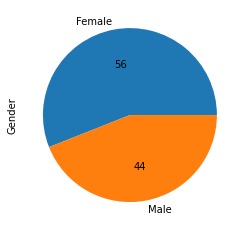

In [12]:
dataset['Gender'].value_counts().plot(kind='pie',autopct='%.0f')

<AxesSubplot:xlabel='Spending Score (1-100)'>

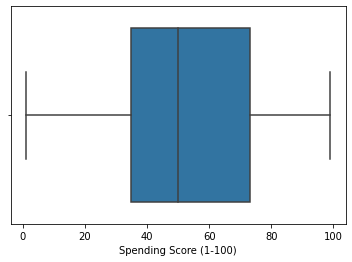

In [13]:
sns.boxplot(x = dataset['Spending Score (1-100)'])

<AxesSubplot:xlabel='Annual Income (k$)'>

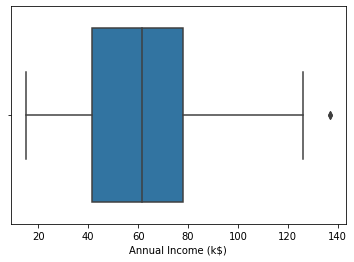

In [14]:
sns.boxplot(x = dataset['Annual Income (k$)'])

#### Bivariate analysis

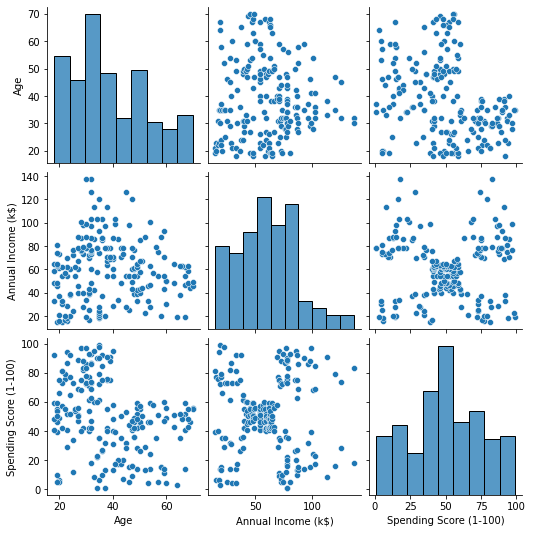

In [15]:
sns.pairplot(dataset.iloc[:,1:])

#### Multivariate analysis

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

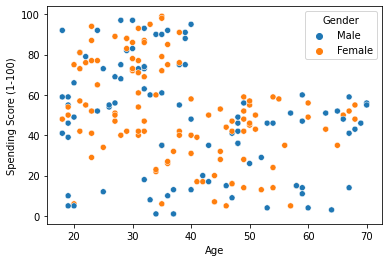

In [16]:
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=dataset,hue='Gender')

## scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
ndataset = dataset.iloc[:,2:]
ndataset = mms.fit_transform(ndataset)

In [18]:
ndataset

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918],
       [0.07692308, 0.01639344, 0.76530612],
       [0.32692308, 0.02459016, 0.05102041],
       [0.09615385, 0.02459016, 0.94897959],
       [0.88461538, 0.03278689, 0.02040816],
       [0.23076923, 0.03278689, 0.7244898 ],
       [0.94230769, 0.03278689, 0.13265306],
       [0.32692308, 0.03278689, 1.        ],
       [0.76923077, 0.04098361, 0.14285714],
       [0.11538462, 0.04098361, 0.7755102 ],
       [0.36538462, 0.04098361, 0.12244898],
       [0.07692308, 0.04098361, 0.79591837],
       [0.32692308, 0.04918033, 0.34693878],
       [0.03846154, 0.04918033, 0.66326531],
       [0.65384615, 0.06557377, 0.28571429],
       [0.32692308, 0.06557377, 0.98979592],
       [0.32692308, 0.07377049, 0.34693878],
       [0.13461538, 0.07377049, 0.73469388],
       [0.

## Kmeans clustering algorithm 

In [19]:
from sklearn.cluster import KMeans
TWSS = []
k = list(range(2,9))

for i in k:
    kmeans = KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(ndataset)
    TWSS.append(kmeans.inertia_)

In [20]:
TWSS

[22.56077488260975,
 17.371946164404168,
 12.65028767622991,
 10.303964892534122,
 8.385099035848988,
 7.14902342483947,
 6.295352745617059]

Text(0, 0.5, 'TWSS')

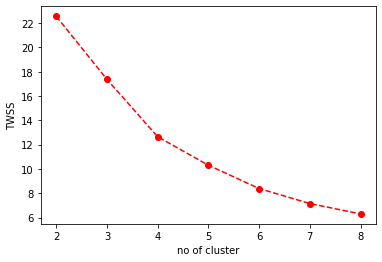

In [21]:
plt.plot(k,TWSS,'ro--')
plt.xlabel('no of cluster')
plt.ylabel('TWSS')

In [22]:
model = KMeans(n_clusters=5)
model.fit(ndataset)

KMeans(n_clusters=5)

In [23]:
mb = pd.Series(model.labels_)

In [24]:
dataset['clust'] = mb

In [25]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


In [26]:
dataset.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
195,196,Female,35,120,79,2
196,197,Female,45,126,28,4
197,198,Male,32,126,74,2
198,199,Male,32,137,18,4
199,200,Male,30,137,83,2


## Add the cluster data with primary dataset

In [27]:
dataset.to_csv('cluster.csv', encoding='utf-8')

In [28]:
import os
os.getcwd()

'D:\\nalaiyathiran'

## split the data into dependent and independent variables

In [29]:
data = pd.read_csv('cluster.csv')

In [30]:
data.head()

,Unnamed: 0,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,0,1,Male,19,15,39,3
1,1,2,Male,21,15,81,0
2,2,3,Female,20,16,6,3
3,3,4,Female,23,16,77,0
4,4,5,Female,31,17,40,3


In [31]:
data.drop(columns=['Unnamed: 0','CustomerID'],inplace=True)

In [32]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,Male,19,15,39,3
1,Male,21,15,81,0
2,Female,20,16,6,3
3,Female,23,16,77,0
4,Female,31,17,40,3


1    58
3    49
2    40
4    30
0    23
Name: clust, dtype: int64

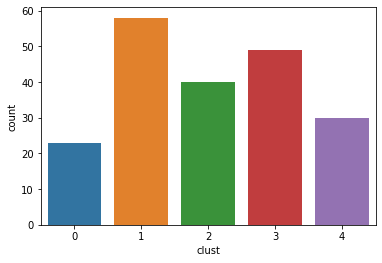

In [33]:
sns.countplot(x=data['clust'] )
data['clust'].value_counts()

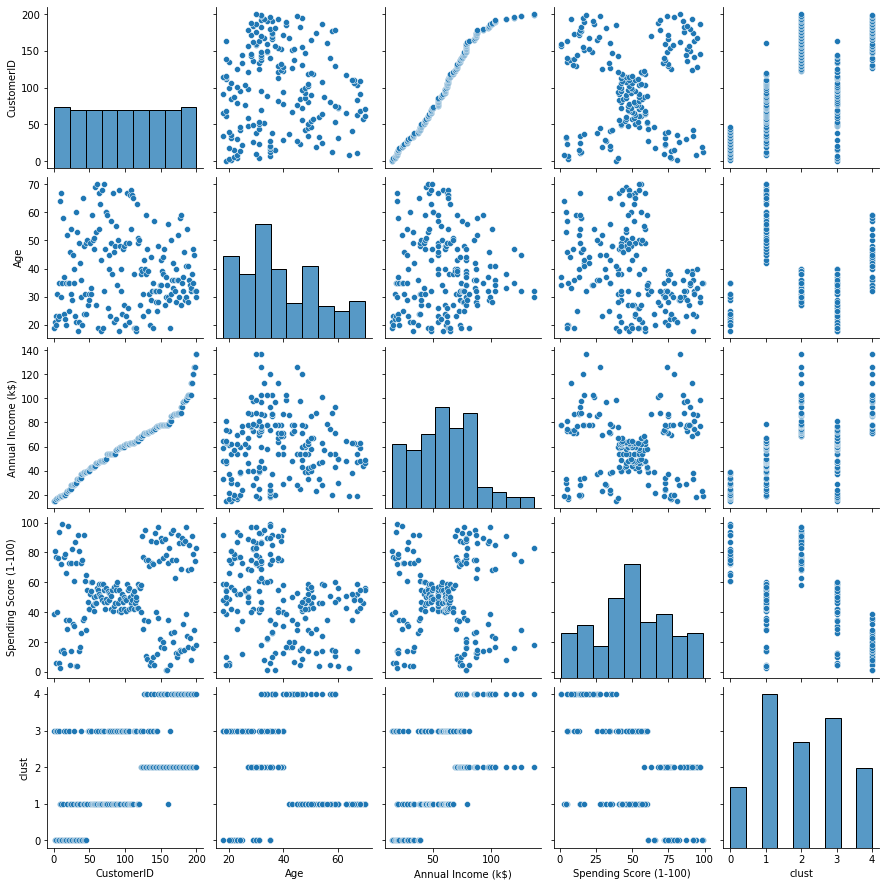

In [34]:
sns.pairplot(dataset.iloc[:,:])

In [35]:
data['Gender'].replace({'Male' : 1,'Female' : 0 }, inplace=True)

In [36]:
x = data.iloc[:,:-1]
y = data['clust']

## split the data into training and testing

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

## Build and train the model 

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

## Test the model

In [40]:
pred = model.predict(x_test)

In [41]:
pred

array([1, 1, 1, 1, 3, 4, 3, 1, 0, 4, 4, 1, 1, 2, 3, 1, 4, 1, 0, 2, 2, 1,
       0, 2, 4, 1, 1, 1, 1, 3, 0, 1, 3, 2, 1, 4, 3, 3, 4, 1], dtype=int64)

## Measure the performance using evaluation metrics

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [43]:
acc = accuracy_score(y_test, pred)
acc

0.975

In [44]:
confusion_matrix(y_test, pred)

array([[ 4,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0,  7,  0],
       [ 0,  1,  0,  0,  7]], dtype=int64)